In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
df = pd.read_csv('Data/Project00_Data_Mine.csv', sep=',')
df.Time_In = pd.to_datetime(df.Day+" " +df.Time_In)
df.Time_Out = pd.to_datetime(df.Day+" " +df.Time_Out)
df["Time_Diff"] = (df.Time_Out - df.Time_In).astype("timedelta64[m]")
df.Reason = df.Reason.str.lower()

In [3]:
total_times = df.groupby("Location").sum()

Text(0, 0.5, 'Total Time in Building [minutes]')

<Figure size 432x288 with 0 Axes>

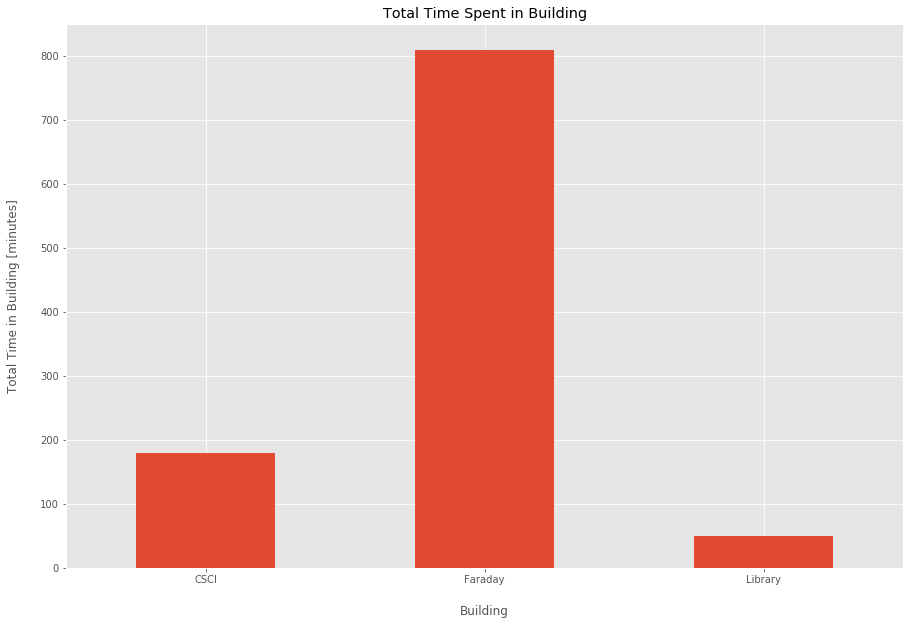

In [4]:
fig = plt.figure()
ax = total_times.plot.bar(title="Total Time Spent in Building",figsize=(15,10),legend=False,rot=0)
ax.set_xlabel("Building",labelpad=20)
ax.set_ylabel("Total Time in Building [minutes]",labelpad=20)

In [5]:
total_times_reason = df.groupby(["Location","Reason"]).sum()

<Figure size 432x288 with 0 Axes>

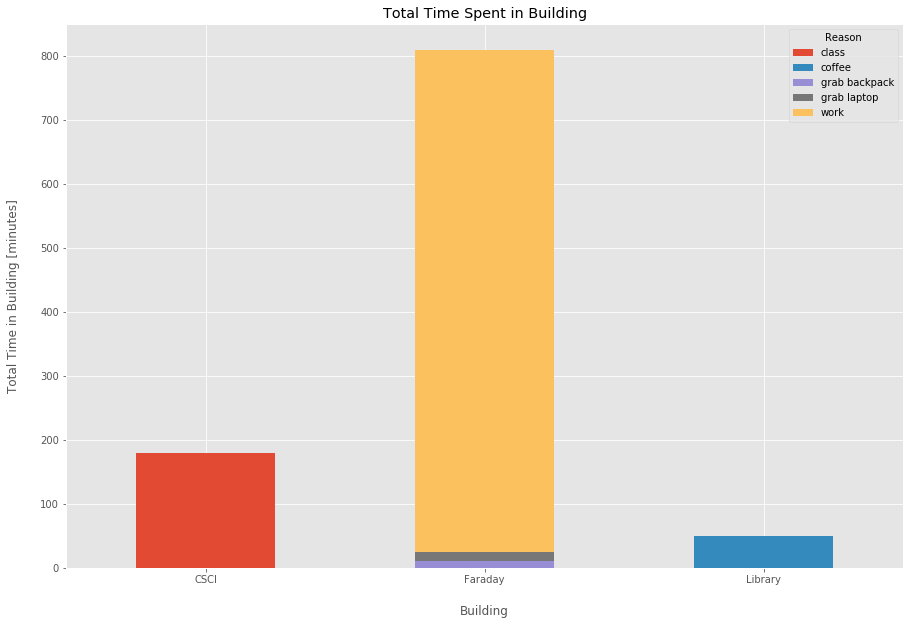

In [7]:
fig = plt.figure()
# ax = total_times_reason.plot.bar(title="Total Time Spent in Building",figsize=(15,10),legend=False,rot=0)
ax = total_times_reason.unstack()["Time_Diff"].plot.bar(title="Total Time Spent in Building",figsize=(15,10),rot=0,stacked=True)
ax.set_xlabel("Building",labelpad=20)
ax.set_ylabel("Total Time in Building [minutes]",labelpad=20)
plt.show()